In [2]:
# !pip install update pip
# !pip install librosa==0.10.1
# !pip install matplotlib==3.2
!pip install pyqt5==5.15.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 11.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 29.0 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.4.3 requires pyqtwebengine<5.16, which is not installed.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## ASSIGNMENT 2

In [2]:
from __future__ import print_function
import librosa

# 1. Get the file path to the included audio example
filename = librosa.example('vibeace', hq=True)
# 2. Load the audio as a waveform `y`
# Store the sampling rate as `sr`
y, sr = librosa.load("./examples/audio/track01_ErosRamazotti.mp3")
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: 61.52 beats per minute


## ASSIGNMENT 2

/Users/pradeep/anaconda3/lib/python3.11/site-packages/librosa/display.py:1372: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'base'. In the future this will raise TypeError
  scaler(mode, **kwargs)


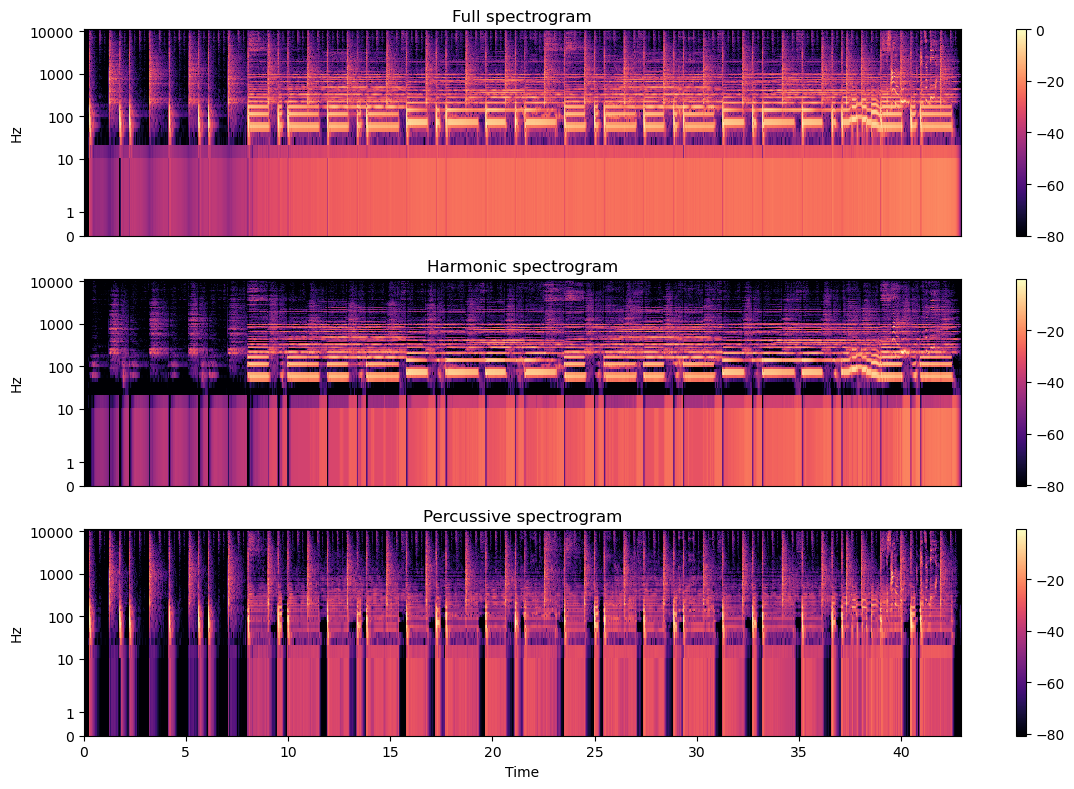

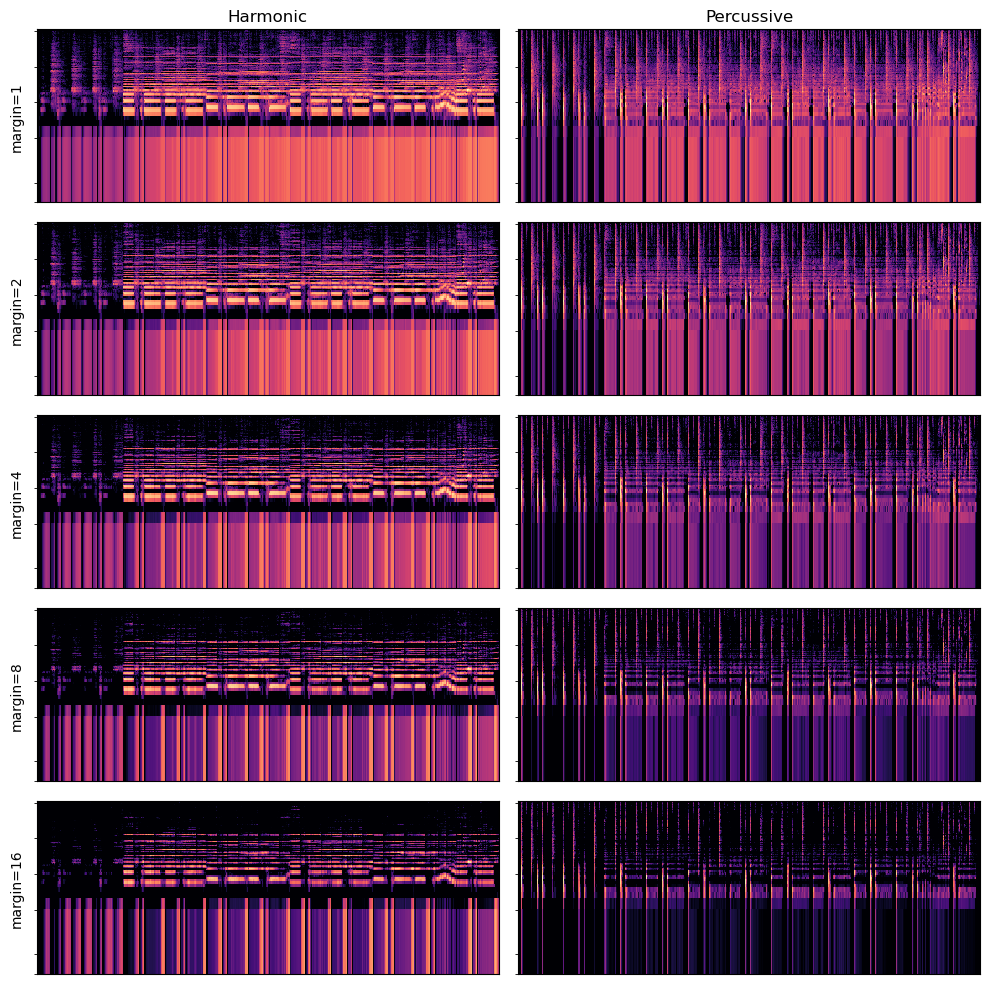

In [8]:
# -*- coding: utf-8 -*-
"""
=====================================
Harmonic-percussive source separation
=====================================

This notebook illustrates how to separate an audio signal into
its harmonic and percussive components.

We'll compare the original median-filtering based approach of
`Fitzgerald, 2010 <http://arrow.dit.ie/cgi/viewcontent.cgi?article=1078&context=argcon>`_
and its margin-based extension due to `Dreidger, Mueller and Disch, 2014
<http://www.terasoft.com.tw/conf/ismir2014/proceedings/T110_127_Paper.pdf>`_.


"""

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

########################
# Load the example clip.
y, sr = librosa.load('./examples/audio/track01_ErosRamazotti.mp3', offset=0, duration=43)


###############################################
# Compute the short-time Fourier transform of y
D = librosa.stft(y)

#####################################################
# Decompose D into harmonic and percussive components
#
# :math:`D = D_\text{harmonic} + D_\text{percussive}`
D_harmonic, D_percussive = librosa.decompose.hpss(D)


####################################################################
# We can plot the two components along with the original spectrogram

# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp), y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()


#################################################################################
# The default HPSS above assigns energy to each time-frequency bin according to
# whether a horizontal (harmonic) or vertical (percussive) filter responds higher
# at that position.
#
# This assumes that all energy belongs to either a harmonic or percussive source,
# but does not handle "noise" well.  Noise energy ends up getting spread between
# D_harmonic and D_percussive.
#
# If we instead require that the horizontal filter responds more than the vertical
# filter *by at least some margin*, and vice versa, then noise can be removed
# from both components.
#
# Note: the default (above) corresponds to margin=1

# Let's compute separations for a few different margins and compare the results below
D_harmonic2, D_percussive2 = librosa.decompose.hpss(D, margin=2)
D_harmonic4, D_percussive4 = librosa.decompose.hpss(D, margin=4)
D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)
D_harmonic16, D_percussive16 = librosa.decompose.hpss(D, margin=16)


#############################################################################
# In the plots below, note that vibrato has been suppressed from the harmonic
# components, and vocals have been suppressed in the percussive components.
plt.figure(figsize=(10, 10))

plt.subplot(5, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp), y_axis='log')
plt.title('Harmonic')
plt.yticks([])
plt.ylabel('margin=1')

plt.subplot(5, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp), y_axis='log')
plt.title('Percussive')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic2), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=2')

plt.subplot(5, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive2), ref=rp), y_axis='log')
plt.yticks([]) ,plt.ylabel('')

plt.subplot(5, 2, 5)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic4), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=4')

plt.subplot(5, 2, 6)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive4), ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 7)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic8), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=8')

plt.subplot(5, 2, 8)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive8), ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 9)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic16), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=16')

plt.subplot(5, 2, 10)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive16), ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.tight_layout()
plt.show()


## Assignment 2 - Part B

/Users/pradeep/anaconda3/lib/python3.11/site-packages/librosa/display.py:1372: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'base'. In the future this will raise TypeError
  scaler(mode, **kwargs)


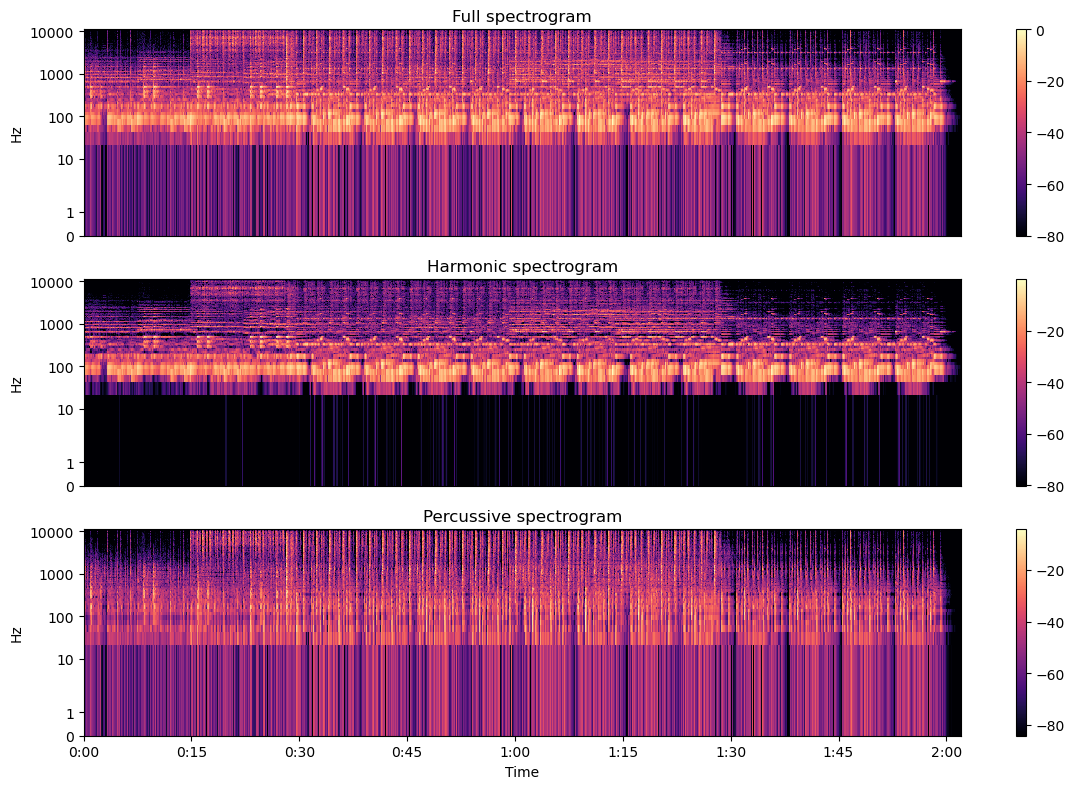

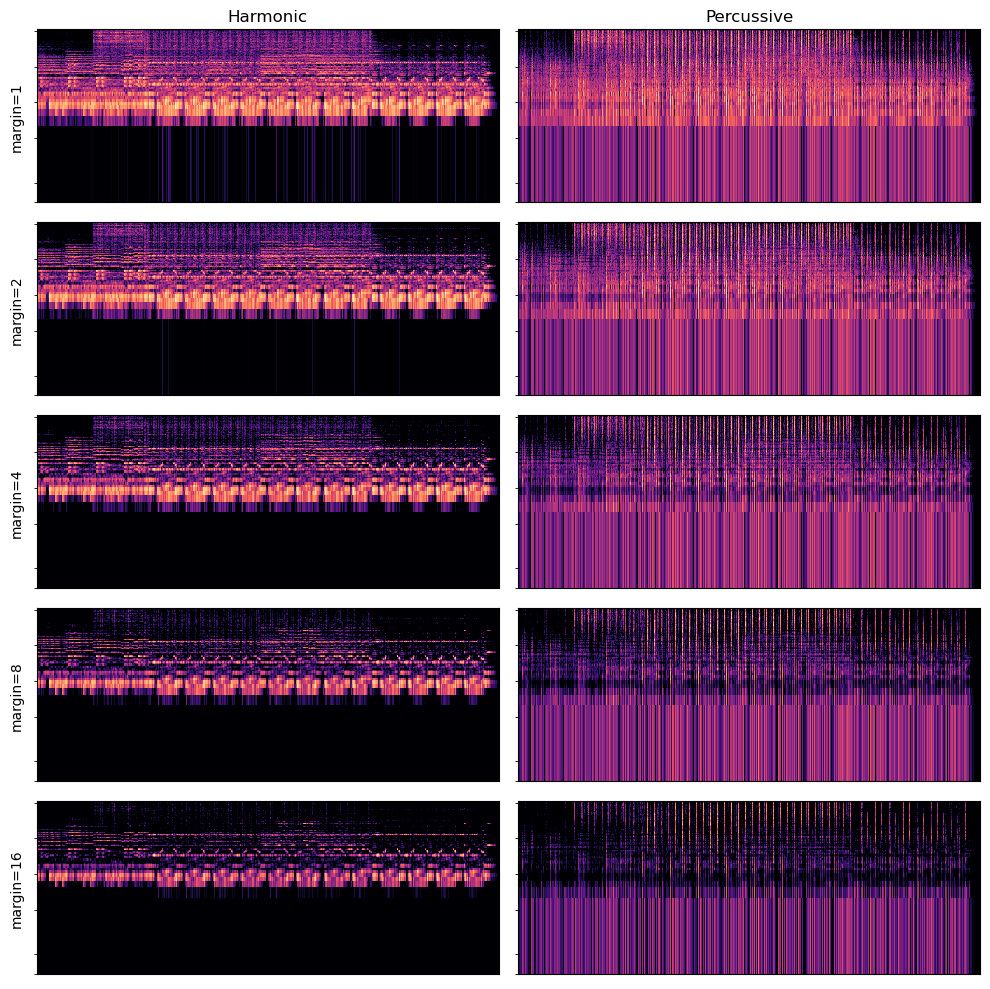

In [9]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

########################
# Load the example clip.
y, sr = librosa.load('./examples/audio/Kevin_MacLeod_-_Vibe_Ace.mp3', offset=0, duration=61)

# Add a filter to reduce low frequency noise for better percussive seperation
y = librosa.effects.preemphasis(y, coef=0.95)

# Normalize the audio for sonsistent peaks
y = librosa.util.normalize(y)

###############################################
# Compute the short-time Fourier transform of y, lower hop lengths for better short percussive sounds
D = librosa.stft(y, n_fft=1024, hop_length=256)

#####################################################
# Decompose D into harmonic and percussive components
#
# :math:`D = D_\text{harmonic} + D_\text{percussive}`
D_harmonic, D_percussive = librosa.decompose.hpss(D)


####################################################################
# We can plot the two components along with the original spectrogram

# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp), y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()


#################################################################################
# The default HPSS above assigns energy to each time-frequency bin according to
# whether a horizontal (harmonic) or vertical (percussive) filter responds higher
# at that position.
#
# This assumes that all energy belongs to either a harmonic or percussive source,
# but does not handle "noise" well.  Noise energy ends up getting spread between
# D_harmonic and D_percussive.
#
# If we instead require that the horizontal filter responds more than the vertical
# filter *by at least some margin*, and vice versa, then noise can be removed
# from both components.
#
# Note: the default (above) corresponds to margin=1

# Let's compute separations for a few different margins and compare the results below
D_harmonic2, D_percussive2 = librosa.decompose.hpss(D, margin=2)
D_harmonic4, D_percussive4 = librosa.decompose.hpss(D, margin=4)
D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)
D_harmonic16, D_percussive16 = librosa.decompose.hpss(D, margin=16)


#############################################################################
# In the plots below, note that vibrato has been suppressed from the harmonic
# components, and vocals have been suppressed in the percussive components.
plt.figure(figsize=(10, 10))

plt.subplot(5, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp), y_axis='log')
plt.title('Harmonic')
plt.yticks([])
plt.ylabel('margin=1')

plt.subplot(5, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp), y_axis='log')
plt.title('Percussive')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic2), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=2')

plt.subplot(5, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive2), ref=rp), y_axis='log')
plt.yticks([]) ,plt.ylabel('')

plt.subplot(5, 2, 5)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic4), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=4')

plt.subplot(5, 2, 6)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive4), ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 7)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic8), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=8')

plt.subplot(5, 2, 8)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive8), ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 9)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic16), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=16')

plt.subplot(5, 2, 10)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive16), ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.tight_layout()
plt.show()
